# There are 2 goals with these plots:
### Goal 1: Plot the frequency of variants. -> density plot tracks
### Goal 2: Plot the BP_size distribution of variants. -> barp plot tracks

In [1]:
module avail


---------- /software/OSutils/modules-4.4.1/share/Modules/modulefiles -----------
1SynChro/1.15
3d-dna/180922
A5-miseq/20160825
abyss/2.0.2
abyss/2.1.0
abyss/2.1.1
abyss/2.1.2
abyss/2.1.3
abyss/2.1.4
abyss/2.1.5
adapterremoval/2.2.2
AfterQC/0.9.1
AfterQC/0.9.5
allpathslg/44837
allpathslg/44913
allpathslg/49722
allpathslg/50191
allpathslg/52488
amos/3.1.0
angsd/0.913
angsd/0.917
angsd/0.917-116-g5d087b2
angsd/0.918
angsd/0.919
angsd/0.921
angsd/0.922
angsd/0.923
angsd/0.925
angsd-wrapper/7224db2
anytag/2.5.2
apsim/7.10-r49ace54f9c8a670190aef9d8d0fb9d5477bb1534
apsim/7.9-r4047
apsimx/2018.01.30.2253
apsimx/2018.09.28.3099
apsimx/2019.01.08.3392
apsimx/2019.04.03.3693
apsimx/2019.06.05.3920
apsimx/2019.07.18.4025
apsimx/2019.10.04.4236
apsimx/2020.04.09.5012
apsimx/2020.08.04.5350
apsimx/2020.10.21.5755
apsimx/2020.11.27.5887
arcs/1.0.6
art/MountRainier
aspera-cli/3.7.2.354.010c3b8
assemblathon_stats/14dfdab
assemblathon_stats/2011_10_13
asub/2.1
asub/2.2
augustus/3.2.2
augustus/3.3
augus

perl/5.12.5
perl/5.12.5-thread-multi
perl/5.14.4
perl/5.14.4-thread-multi
perl/5.16.3
perl/5.16.3-thread-multi
perl/5.18.4
perl/5.20.3
perl/5.20.3-thread-multi
perl/5.22.2
perl/5.22.2-thread-multi
perl/5.24.0
perl/5.24.0-thread-multi
perl/5.24.1
perl/5.24.1-thread-multi
perl/5.26.0
perl/5.26.0-thread-multi
perl/5.28.0
perl/5.28.0-thread-multi
perl/5.30.2
perl/5.30.2-thread-multi
perl/5.8.9
perl/5.8.9-thread-multi
perl/bio-extras
perl/bio-extras-5.24.0-legacy
perl/core
perl/ensembl
perl/jupyterhub
perlbrew/0.76
pfr-python2/2.7.13
pfr-python3/3.6.1
pfr-python3/3.6.5
pfr-python3/3.6.6
phylip/3.696
phylobayes/4.1c
PhyloSift/1.0.1
picard-tools/1.112
picard-tools/1.79
picard-tools/2.10.1
picard-tools/2.18.7
picard-tools/2.2.4
picard-tools/2.9.4
picrust2/2.3.0
pilon/1.18
pilon/1.20
pilon/1.23
pinfish/0.1.0
platanus/1.2.4
platanus_trim/1.0.7
Platypus/0.8.1
plink/1.07
plink/1.90b6.5
plink2/v2.00a2lm
plncpro/1.1
popoolation2/1201
porechop/0.2.3
portcullis/1.1.0
portcullis/1.1.1
portcullis/1.1.2


In [1]:
pwd

/powerplant/workspace/hramzr/2_Phd_PROJECT/plotting


# Make genome file

In [4]:
out=/workspace/hramzr/2_Phd_PROJECT/plotting/
fai=/powerplant/workspace/hramzr/2_Phd_PROJECT/snapper_genome/Chrysophrys_auratus.v.1.0.chromosomes.male.map.fasta.fai
cat  $fai | \
awk -v OFS='\t' {'print $1,$2'} >chromosomefile.genome

# Make bedfile for ideogram

In [7]:
module load bedtools
ref=/powerplant/workspace/hramzr/2_Phd_PROJECT/snapper_genome/Chrysophrys_auratus.v.1.0.chromosomes.male.map.fasta
bedtools makewindows -w 10000 -g chromosomefile.genome > 100kb_windows.bed

# Make bedfile for density tracks and size tracks
#### First extract the individuals used for growth prediction

In [99]:
cat /workspace/hramzr/2_Phd_PROJECT/variant_dataframes/Merged_variant_phenotype_data/SV_growth_50kb_1kb_5 | tail -n+2 | awk '{print $1}' | uniq \
| awk '{if(length($1)<9){print 0$0} else {print $0}}'>indvs_growth

In [2]:
module load bedtools
indvs=$(cat indvs_growth)
out=/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth
for indv in $indvs
do
mdir=/workspace/hramzr/2_Phd_PROJECT/VarCallingWGS/parliament2_calling/${indv}/outputs/
cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<DEL>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/dels.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<INS>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/ins.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<INV>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/invs.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<DUP>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/dups.bed
done

# Include significant regions

In [2]:
cat topscores.txt | tr "," "\n" | tr -d "''" | tr -d "[]" | tr -d "dups|dels|invs|ins" | tr "_" "  " | awk '{print $1, $2, ($2+50000)}' \
| sort -k1,1 -k2,2n>topregions



ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: cat topscores.txt
        ^


## Density/size plot for SVs

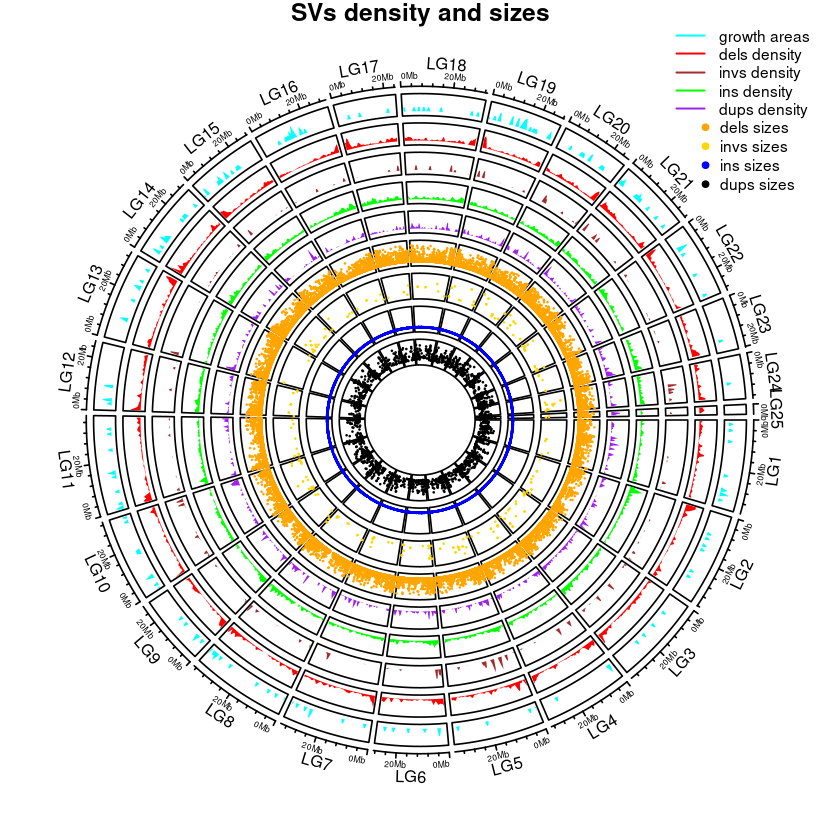

In [2]:
library(circlize)
library(data.table)
library(dplyr)
circos.par("track.height" = 0.07, canvas.xlim = c(-1.0, 1.0), canvas.ylim = c(-1.0, 1.0))
chromosomes <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/100kb_windows.bed")

dels <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/dels.bed")

ins <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/ins.bed")

dups <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/dups.bed")

invs <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/invs.bed")

sign <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/topscoring_regions")

sign <- sign
circos.genomicInitialize(chromosomes)

circos.genomicDensity(sign, col = c("cyan"), track.height = 0.06)

circos.genomicDensity(dels, col = c("red"), track.height = 0.06) # red

circos.genomicDensity(invs, col = c("brown"), track.height = 0.06) # red

circos.genomicDensity(ins, col = c("green"), track.height = 0.06) # red

circos.genomicDensity(dups, col = c("purple"), track.height = 0.06) # red

circos.track(ylim = c(0, 1))

circos.trackPoints(dels$V1, dels$V2, dels$V4, cex=0.005, c="orange")

circos.track(ylim = c(0, 1))

circos.trackPoints(invs$V1, invs$V2, invs$V4, cex=0.0005, c="gold")

circos.track(ylim = c(0, 1))

circos.trackPoints(ins$V1, ins$V2, ins$V4, cex=0.005, c="blue")

circos.track(ylim = c(0, 1))

circos.trackPoints(dups$V1, dups$V2, dups$V4, cex=0.005, c="black")

title("SVs density and sizes")
legend(0.74, 0.85,legend=c("dels sizes",  "invs sizes", "ins sizes", "dups sizes"),
       col=c("orange", "gold", "blue", "black"),cex=0.75,pch=c(16,16), bty='n')
legend(0.66,0.9,legend="dups density",col="purple",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,0.95,legend="ins density",col="green",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.0,legend="invs density",col="brown",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.05,legend="dels density",col="red",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.10,legend="growth areas",col="cyan",lty=1,cex=0.75,lwd=1.2,bty='n')
par(xpd=TRUE)
circos.clear()

# Testing grounds

[1]  0.4745191028 -0.7186734390  0.8365918313  0.0175887456 -0.6943776766
   [6] -0.7700210691  0.1074031059 -0.8010419614 -1.2186671046 -0.2114712438
  [11] -0.8355797784 -0.1815013819  1.1268137786 -0.8650949238  0.0907486982
  [16] -0.9158681623  0.6439911453 -0.9692845913  0.7239756113 -0.0885504702
  [21]  0.6727058413 -0.1406650481 -0.3710134175 -0.4964600619 -1.2244060366
  [26] -0.7511747271 -0.3294936282 -0.6993275524 -0.4170065593  0.1006857600
  [31]  0.4282031177 -0.5168861051 -0.8122810449 -1.3083014824  1.5770764141
  [36]  0.4913536876  0.9671185072 -0.5401794405 -0.8050616512  1.1200249081
  [41] -0.5725364861  1.7304380632  0.1444833217  1.7453812882 -0.2477112758
  [46]  1.7779737363 -1.5160041936 -1.4379997029  0.0242867439  1.3892237402
  [51]  0.5530258172  0.2086924756 -0.3458949255 -0.1085002332  1.0365350722
  [56] -1.9894026034 -0.7754284530  0.1058301438 -0.4872147863 -0.7955943516
  [61]  1.0123162975  0.6668262518  0.6060324488  1.0200643703 -0.4270088311
  [66] -1.5780134710  0.2301451599 -0.3012237412 -1.1104958066  0.3950466228
  [71] -1.1966313327 -1.1242729937 -0.4217430539  1.0320318189 -0.8669922687
  [76] -0.1776508713  1.3914637925  0.7169521480  0.8629255528 -1.1322296969
  [81]  0.2226036503 -1.0327611673  0.5612682822  0.2510960849  0.8721577651
  [86]  0.7590369562  0.0927410899 -1.6698563090  1.5154982308 -1.6589027390
  [91]  0.8802494352 -0.7352702589  1.2151433909 -0.7825025871  0.0270302768
  [96] -1.0140433007 -1.2511712310  0.3483600476  1.0396944598 -1.4759320698
 [101] -0.9855234374  0.8139140369 -1.5748688308  0.1929259195  1.0524441493
 [106] -2.4956679510  0.1380750760  0.1535845550  0.2839414757  1.2891325401
 [111]  0.1932695064 -0.4639602669 -0.9255609711  0.5604175700  0.9280678742
 [116]  0.1189419750 -0.7951145209  0.8985784005 -0.3484841028 -0.7406074982
 [121] -1.0681860433 -1.4075523926  0.2422222372 -0.7714930571  1.1499625749
 [126]  0.1864483262 -0.1044366761  0.2975358244  0.6846341500 -2.1418588508
 [131]  0.8351998198 -2.0098772006  0.2662779303  0.0774793198  0.4241593487
 [136] -0.0920574046  1.1225730579 -0.0886712091  0.6982536516 -0.4826075118
 [141]  1.1714230814 -0.0695289149  1.1496406341 -0.7520999781  0.7814080023
 [146]  1.1754161411  0.6802944182  0.2580943294  1.3479757409  0.4988287777
 [151] -1.1471678815  0.6074678461 -0.7063824349 -0.3247895847 -0.9799414995
 [156]  0.0734974022  0.0485928393 -1.0852896116  0.0527871877 -0.5774856814
 [161]  0.2163334853  0.6524026300  1.3858714510 -2.1655705357 -0.1012040079
 [166] -0.8848930786 -2.0297312756  0.4675177300  1.2146464880  2.0541620544
 [171]  1.5592149083 -0.2060550923 -1.8198843885  1.1288341680  0.2554584344
 [176]  0.5931384192  0.0154964831 -1.3017313939 -1.2386472708  1.7653095465
 [181] -0.5167759293 -0.3393181702 -0.6145515673  1.4274757738 -1.2241448509
 [186]  0.2386388897 -0.6201971339  0.0060139614 -0.6929828280 -0.4390761257
 [191] -0.4023674598 -1.6000642902  1.4342078637  0.2579465077 -1.4863291341
 [196] -1.5716407641  0.2846362013  0.4556593904  0.6902300159 -0.5074500680
 [201] -0.7221119916  2.6828606893 -0.7441150534 -0.6775311465 -0.2099784882
 [206]  0.4331148004  0.1854266467  1.3469329451  1.2087610522  1.9320729783
 [211] -0.6105282677 -0.5722509640 -1.1048339429 -0.1506782246 -0.4663092352
 [216]  0.2060173477 -0.6518122017  1.7818393403 -0.9989896744 -0.2324021651
 [221] -0.3146767177  0.3500361748  1.9661767637 -0.6080056717 -0.8989872291
 [226] -0.2188760317 -0.3240498559 -0.6583954830  1.6180228168 -0.3507995784
 [231] -0.8577621487 -0.4154359702 -0.5151035298 -0.8614000275 -0.2091663126
 [236]  1.3865807867  0.0674931966 -0.6663361446 -0.6265664280 -1.1349871232
 [241] -0.2773082036 -1.3492454435 -2.1493898266  1.1718140408  0.1836426181
 [246] -0.8940375718 -0.3152021299 -0.8257520930  0.6097293554 -2.3952498785
 [251]  0.4424234914  0.8401991277  0.8875713510 -1.6166701357  0.9769679911
 [256] -0.1027795395  0.4211827161 -1.3053005029  1.9775594598  0.3339123934

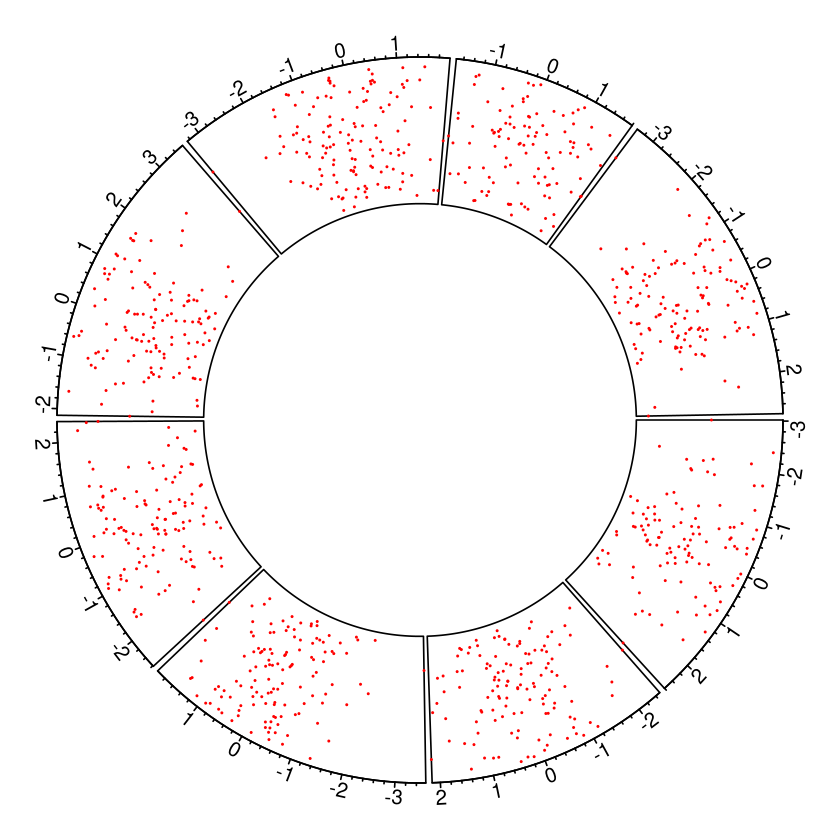

In [16]:
# Upload library
library(circlize)
circos.par("track.height" = 0.4)

# Create data
data = data.frame(
    factor = sample(letters[1:8], 1000, replace = TRUE),
    x = rnorm(1000),
    y = runif(1000)
    )

# Step1: Initialise the chart giving factor and x-axis.
circos.initialize( factors=data$factor, x=data$x )

# Step 2: Build the regions.
circos.trackPlotRegion(factors = data$factor, y = data$y, panel.fun = function(x, y) {
    circos.axis()
    })

# Step 3: Add points
circos.trackPoints(data$factor, data$x, data$y, cex=0.05, c="red")

data$x

ERROR: Error in circos.trackPoints(test$V1, test$V2, test$V4, cex = 0.1, c = "red", : unused argument (track.height = 0.005)


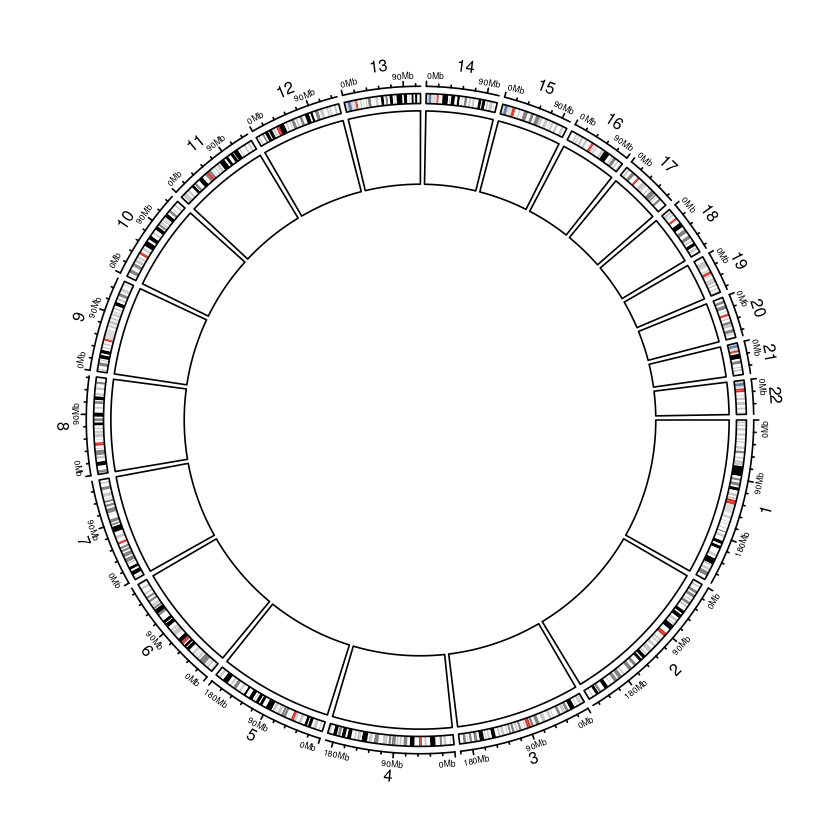

In [6]:
# library(circlize)
# library(data.table)
# library(dplyr)
test <- fread("test.bed")
load(system.file(package = "circlize", "extdata", "DMR.RData"))
circos.initializeWithIdeogram(chromosome.index = paste0("chr", 1:22))
# circos.trackPlotRegion(factors = test$V1, y = test$V4, panel.fun = function(x, y) {
#     circos.axis()
#     })

circos.track(ylim = c(0, 1))
circos.trackPoints(test$V1, test$V2, test$V4, cex=0.10, c="red", track.height = 0.005)




# # Upload library
# library(circlize)
# circos.par("track.height" = 0.4)

# # Create data
# data = data.frame(
#     factor = sample(letters[1:8], 1000, replace = TRUE),
#     x = rnorm(1000),
#     y = runif(1000)
#     )

# # Step1: Initialise the chart giving factor and x-axis.
# circos.initialize( factors=data$factor, x=data$x )

# # Step 2: Build the regions.
# circos.trackPlotRegion(factors = data$factor, y = data$y, panel.fun = function(x, y) {
#     circos.axis()
#     })

# # Step 3: Add points
# circos.trackPoints(data$factor, data$x, data$y, cex=0.05, c="red")

# data$y

In [16]:
head(genomicDensity(DMR_hyper, window.size = 1e6))


chr,start,end,value
chr1,1,1000000,0.003093
chr1,500001,1500000,0.007592
chr1,1000001,2000000,0.008848
chr1,1500001,2500000,0.010155
chr1,2000001,3000000,0.011674
chr1,2500001,3500000,0.007783


In [1]:
echo "chr1    1    100000    1.000000">test.bed
echo "chr1    100001    200000    1.000000">>test.bed
echo "chr1    200001    300000    1.000000">>test.bed
echo "chr1    300001    400000    1.000000">>test.bed
echo "chr1    400001    500000    1.000000">>test.bed
echo "chr1    500001    600000    1.000000">>test.bed



echo "chr2    1    100000    0.004000">>test.bed
echo "chr2    100001    200000    0.004000">>test.bed
echo "chr2    200001    300000    0.004000">>test.bed
echo "chr2    300001    400000    0.004000">>test.bed
echo "chr2    400001    500000    0.004000">>test.bed
echo "chr2    500001    600000    0.004000">>test.bed

In [15]:
DMR_hyper

,chr,start,end
70,chr1,933445,934443
104,chr1,969766,970362
105,chr1,975271,976767
154,chr1,1108819,1109923
155,chr1,1141445,1142405
157,chr1,1181550,1182782
248,chr1,1370645,1371844
281,chr1,1565502,1567998
294,chr1,1713377,1714716
461,chr1,1982492,1983003
